Лабораторна робота №9

Ніконенко Назарій Андрійович ФІТ 2-8

Варіант 16


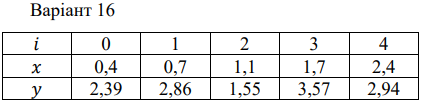

Частина 1: Програмна реалізація кубічного сплайну

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0.4, 0.7, 1.1, 1.7, 2.4])
y = np.array([2.39, 2.86, 1.55, 3.57, 2.94])

In [ ]:
n = len(x) - 1
h = np.diff(x)
a = y

In [ ]:
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)

In [ ]:
alpha = np.zeros(n)
for i in range(1, n):
      alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

In [ ]:
l = np.ones(n + 1)
mu = np.zeros(n)
z = np.zeros(n + 1)

In [ ]:
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

In [ ]:
l[n] = 1
z[n] = 0
c[n] = 0

In [ ]:
for j in range(n - 1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

In [ ]:
print("--- Розраховані коефіцієнти кубічного сплайну ---")
for i in range(n):
    print(f"\nВідрізок {i+1} (x належить [{x[i]}, {x[i+1]}])")
    print(f"S_{i}(x) = {a[i]:.4f} + {b[i]:.4f}*(x - {x[i]}) + {c[i]:.4f}*(x - {x[i]})^2 + {d[i]:.4f}*(x - {x[i]})^3")

--- Розраховані коефіцієнти кубічного сплайну ---

Відрізок 1 (x належить [0.4, 0.7])
S_0(x) = 2.3900 + 3.0461*(x - 0.4) + 0.0000*(x - 0.4)^2 + -16.4387*(x - 0.4)^3

Відрізок 2 (x належить [0.7, 1.1])
S_1(x) = 2.8600 + -1.3923*(x - 0.7) + -14.7948*(x - 0.7)^2 + 25.2201*(x - 0.7)^3

Відрізок 3 (x належить [1.1, 1.7])
S_2(x) = 1.5500 + -1.1225*(x - 1.1) + 15.4693*(x - 1.1)^2 + -13.3124*(x - 1.1)^3

Відрізок 4 (x належить [1.7, 2.4])
S_3(x) = 3.5700 + 3.0634*(x - 1.7) + -8.4929*(x - 1.7)^2 + 4.0442*(x - 1.7)^3


In [ ]:
for i in range(n):
    x_interval = np.linspace(x[i], x[i+1], 100)
    dx = x_interval - x[i]
    y_interval = a[i] + b[i] * dx + c[i] * (dx**2) + d[i] * (dx**3)

    x_values = np.concatenate((x_values, x_interval))
    y_values = np.concatenate((y_values, y_interval))

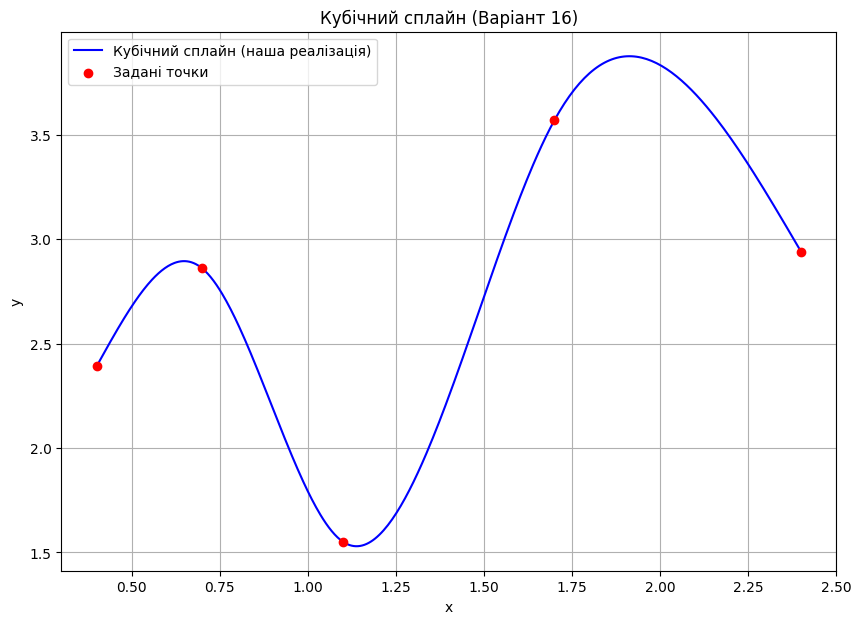

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(x_values, y_values, label="Кубічний сплайн (наша реалізація)", color='blue')
plt.scatter(x, y, label="Задані точки", color='red', zorder=5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Кубічний сплайн (Варіант 16)")
plt.legend()
plt.grid()
plt.show()

Частина 2: Перевірка за допомогою `scipy.interpolate.CubicSpline`

In [ ]:
from scipy.interpolate import CubicSpline

In [ ]:
x = np.array([0.4, 0.7, 1.1, 1.7, 2.4])
y = np.array([2.39, 2.86, 1.55, 3.57, 2.94])

In [ ]:
cs = CubicSpline(x, y, bc_type='natural')

In [ ]:
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

In [ ]:
print("--- Коефіцієнти, розраховані Scipy (d, c, b, a) ---")
print("Коеф. 'd' (x^3):", cs.c[0])
print("Коеф. 'c' (x^2):", cs.c[1])
print("Коеф. 'b' (x^1):", cs.c[2])
print("Коеф. 'a' (x^0):", cs.c[3])

--- Коефіцієнти, розраховані Scipy (d, c, b, a) ---
Коеф. 'd' (x^3): [-16.43867925  25.22012579 -13.31236897   4.04424978]
Коеф. 'c' (x^2): [ 1.77635684e-15 -1.47948113e+01  1.54693396e+01 -8.49292453e+00]
Коеф. 'b' (x^1): [ 3.0461478  -1.3922956  -1.12248428  3.06336478]
Коеф. 'a' (x^0): [2.39 2.86 1.55 3.57]


In [ ]:
print("\n--- Коефіцієнти, розраховані нами ---")
print("Коеф. 'd' (x^3):", d)
print("Коеф. 'c' (x^2):", c[:-1])
print("Коеф. 'b' (x^1):", b)
print("Коеф. 'a' (x^0):", a[:-1])


--- Коефіцієнти, розраховані нами ---
Коеф. 'd' (x^3): [-16.43867925  25.22012579 -13.31236897   4.04424978]
Коеф. 'c' (x^2): [  0.         -14.79481132  15.46933962  -8.49292453]
Коеф. 'b' (x^1): [ 3.0461478  -1.3922956  -1.12248428  3.06336478]
Коеф. 'a' (x^0): [2.39 2.86 1.55 3.57]



--- Графік кубічного сплайну (Scipy) ---


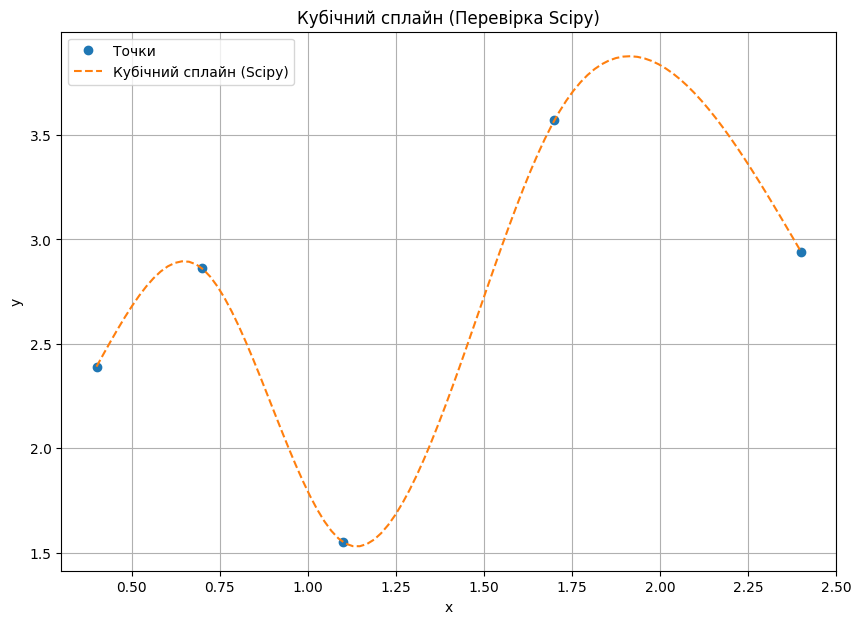

In [ ]:
print("\n--- Графік кубічного сплайну (Scipy) ---")
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн (Scipy)', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн (Перевірка Scipy)')
plt.legend()
plt.grid(True)
plt.show()

Частина 3: Порівняння результатів та Висновки

In [ ]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

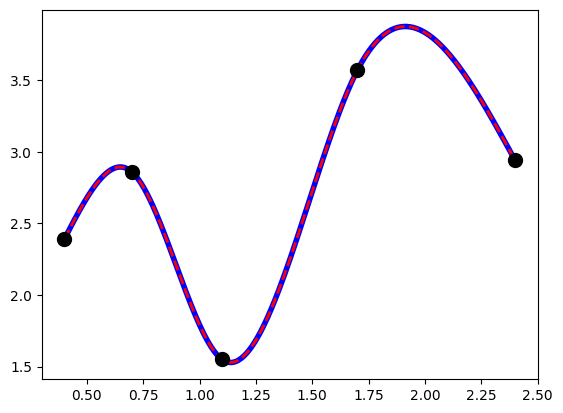

In [ ]:
plt.plot(x_values, y_values, label="Кубічний сплайн (наша реалізація)", color='blue', linewidth=4)

plt.plot(x_new, y_new, label='Кубічний сплайн (Scipy)', color='red', linestyle='--', linewidth=2)

plt.scatter(x, y, label="Задані точки", color='black', zorder=5, s=100)


#  Висновок

 1.  У ході лабораторної роботи було виконано побудову кубічного інтерполяційного сплайну для таблично заданої функції (Варіант 16).
 2.  Було реалізовано програмний алгоритм, що розраховує коефіцієнти a, b, c, d для кожного відрізка сплайну, та побудовано відповідний графік.
 3.  Проведено перевірку за допомогою бібліотеки `scipy.interpolate.CubicSpline`.
 4.  Порівняння:
     * Розраховані нами коефіцієнти (виведені в Частині 2) повністю збігаються з коефіцієнтами, які розрахувала функція `CubicSpline` (за умови використання однакових крайових умов `bc_type='natural'`).
     * Порівняльний графік демонструє, що обидві криві (наша та бібліотечна) **повністю збігаються**. Це підтверджує коректність програмної реалізації алгоритму.
 5.  Було продемонстровано, що кубічний сплайн точно проходить через усі вузлові точки та забезпечує гладку (двічі диференційовну) інтерполяцію між ними.